In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

In [2]:
# define a helper function
def draw_plots(data, axis, bins):
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(data[axis], bins, density=True)
    return fig, ax

In [3]:
x = np.linspace(0, 6, num=100) # for plot norm function

In [4]:
data = pd.read_excel('iris data.xlsx')
bins = np.arange(0, 6, 0.2)
axis = 'Petal length'

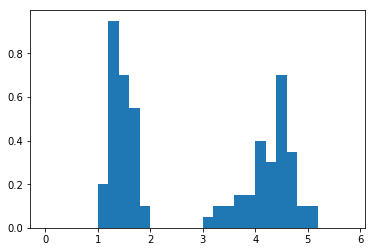

In [5]:
data_fig, data_ax = draw_plots(data, axis, bins)

Above is the normalized histogram for (a)

In [6]:
data_mean = data.mean()[axis]
data_std = data.std()[axis]
data_mean, data_std

(2.8620000000000005, 1.4485645977792618)

The mean and std are 2.862 and 1.449, respectively

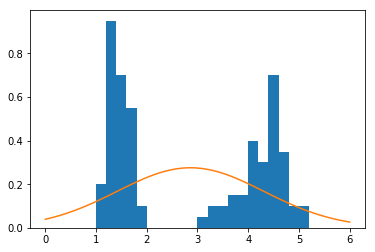

In [7]:
data_ax.plot(x, stats.norm.pdf(x, data_mean, data_std))
data_fig

The estimated pdf is shown above, which is not a good model for the data.

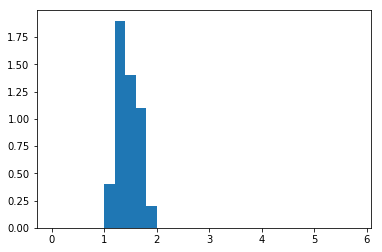

In [8]:
data_setosa = data[data['Class'] == 'Iris-setosa']
data_setosa_fig, data_setosa_ax = draw_plots(data_setosa, axis, bins)

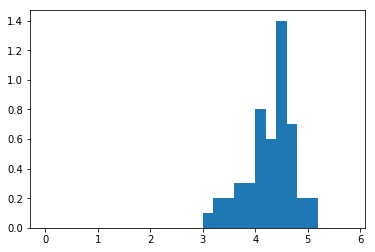

In [21]:
data_versicolor = data[data['Class'] == 'Iris-versicolor']
data_versicolor_fig, data_versicolor_ax = draw_plots(data_versicolor, axis, bins)

The normalized histogram are shown above.

In [16]:
data_setosa_mean = data_setosa.mean()[axis]
data_setosa_std = data_setosa.std()[axis]
# note that we are calculating var now, not std!
data_setosa_mean, data_setosa_std * data_setosa_std 

(1.464, 0.030106122448979606)

In [17]:
data_versicolor_mean = data_versicolor.mean()[axis]
data_versicolor_std = data_versicolor.std()[axis]
data_versicolor_mean, data_versicolor_std * data_versicolor_std

(4.26, 0.2208163265306124)

Above are the conditional mean and var of petal length.
Note that we still use 1/(n-1) to normalize the varience, not 1/n,
which is because the former is a non-biase estimation of sample varience.
If the empirical conditional varience here requires 1/n, replace it with
```python
data_foo_std * data_foo_std * (data_foo.size() - 1) / data_foo.size()
```

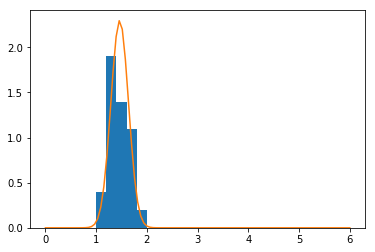

In [18]:
data_setosa_ax.plot(x, stats.norm.pdf(x, data_setosa_mean, data_setosa_std))
data_setosa_fig

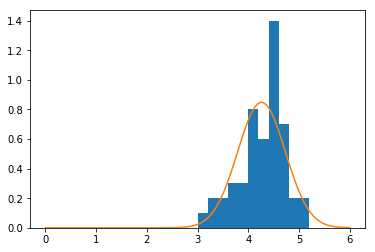

In [22]:
data_versicolor_ax.plot(x, stats.norm.pdf(x, data_versicolor_mean, \
                                          data_versicolor_std))
data_versicolor_fig

The conditional pdf are shown above, which are relatively good assumptions.

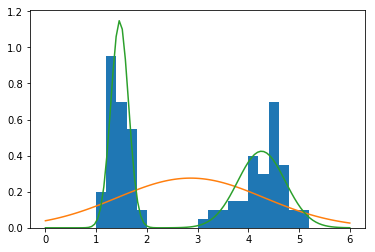

In [23]:
data_ax.plot(x, (stats.norm.pdf(x, data_setosa_mean, data_setosa_std) \
                 + stats.norm.pdf(x, data_versicolor_mean, data_versicolor_std)) / 2)
data_fig

The green one in part(g) looks better than the orange one in part(c).